# 2023A Reductions - clean

In [1]:
from astropy.io import fits
import os
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import tempfile
import imageio
from scipy import signal
from importlib import reload
from scipy.optimize import curve_fit
from importlib import reload
import pandas as pd
# importing the new code
import sparkles.spark as spkl
import sparkles.spark_plots as sp

In [2]:
import os 
os.environ

environ{'MKLROOT': '/opt/intel/oneapi/mkl/2023.0.0',
        'CUDA_PATH': '/opt/conda',
        'XDG_SESSION_ID': '1546',
        'HOSTNAME': 'exao0.as.arizona.edu',
        'SELINUX_ROLE_REQUESTED': '',
        'PVCAM_UMD_PATH': '/opt/pvcam/drivers/user-mode',
        'SHELL': '/usr/bin/bash',
        'HISTSIZE': '1000',
        'SSH_CLIENT': '100.115.195.23 58329 22',
        'LIBRARY_PATH': '/opt/intel/oneapi/mkl/2023.0.0/lib/intel64:/opt/intel/oneapi/mkl/2023.0.0/lib/intel64',
        'CONDA_SHLVL': '1',
        'CONDA_PROMPT_MODIFIER': '',
        'SELINUX_USE_CURRENT_RANGE': '',
        'GSETTINGS_SCHEMA_DIR_CONDA_BACKUP': '',
        'QT_GRAPHICSSYSTEM_CHECKED': '1',
        'USER': 'eden',
        'LD_LIBRARY_PATH': '/opt/intel/oneapi/mkl/2023.0.0/lib/intel64:/opt/intel/oneapi/mkl/2023.0.0/lib/intel64',
        'CONDA_EXE': '/opt/conda/bin/conda',
        'CPATH': '/opt/intel/oneapi/mkl/2023.0.0/include:/opt/intel/oneapi/mkl/2023.0.0/include',
        '_CE_CONDA': '',
        '

In [2]:
# common directories
data_dir = '/home/eden/data/2023A/'
lab_dir = '/home/eden/data/2023A/LAB/'
RM_dir = "/home/eden/data/self_RMs/"
# calibration files
dir_calib = '../data/calib/'
mask = 'aol1_wfsmask.fits'
ref = 'aol1_wfsref.fits'
dark = 'camwfs-dark_bin2_2000.000000_600.000000_-45.000000__T20220422005142597501326.fits'

# 03_07 - Beta Pic
HZ value: 1800

MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 20   ANGS : 0   AMPS : 0.02   CROSS : 1

In [3]:
# SelfRM data
selfRM_sky_0307 = fits.open(RM_dir + 'selfRM_20230305_06_betaPic_sparkles_triggered.fits')[0].data
selfRM_lab_0307 = fits.open(RM_dir + 'selfRM_LAB_20230308_20_002.fits')[0].data

In [4]:
# data - sky
sky_dir_0307 = data_dir + "03_07_spark_BetaPic/camwfs/"
# data - lab
lab_dir_0308 = lab_dir + "lab_1800_sparkles_1Hz_amp020_sep20/camwfs/" # will probably need to switch this

In [ ]:
# Generate sparkles object
sp_sky_0307 = spkl.Spark(sky_dir_0307, lab_dir_0308, dir_calib, dark, mask, ref)

# doesn't work bc I deleted the files!

In [5]:
# Pulling saved dot product
avg_dot_file = sky_dir_0307.replace('camwfs/', "data_chunks_list.npy")
avg_dot_0307 = np.vstack(np.load(avg_dot_file))

In [8]:
avg_dot_0307[:1600,:,:].shape

(1600, 4, 4)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

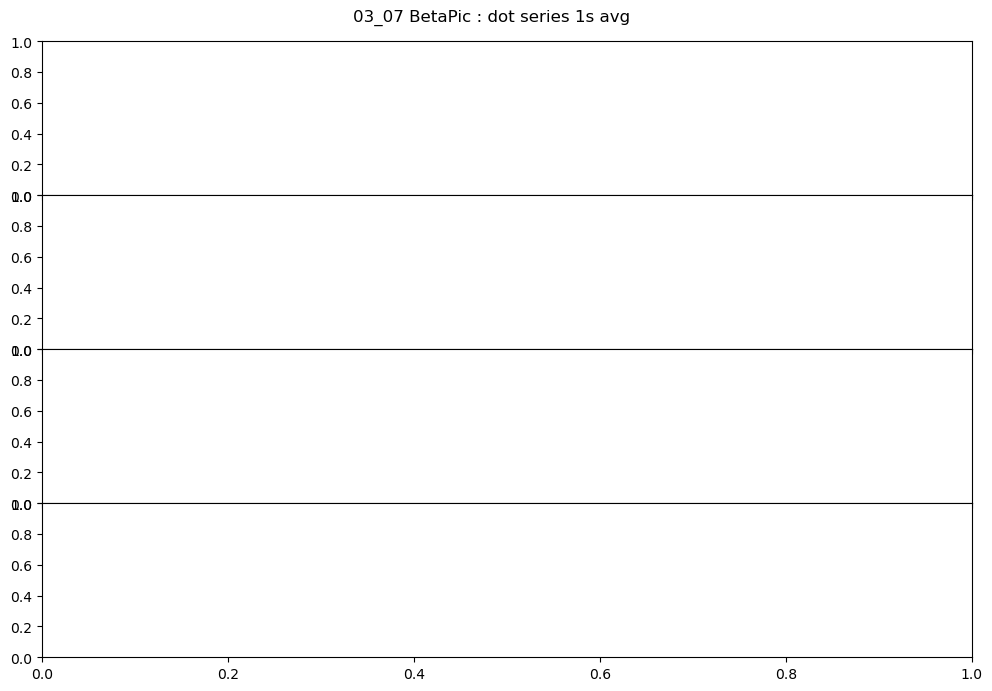

In [7]:
sp.plot_dotSeries_all("03_07 BetaPic ", avg_dot_0307[:1600,:,:], min=-0.0005, max=0.0005)

In [ ]:
#Divide by lab data:
lab_long_20 = lab_dir + "lab_1800_long_spark_1Hz_amp020_sep20_real/camwfs/"
avg_dot_file = lab_long_20.replace('camwfs/', "data_chunks_list.npy")
avg_dot_long = np.vstack(np.load(avg_dot_file))
real_avg_dot = 

# 03_08 - Beta Pic
HZ value: 1800

MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 20   ANGS : 0   AMPS : 0.02   CROSS : 1  


In [7]:
# SelfRM data
selfRM_sky_0308 = fits.open(RM_dir + 'selfRM_20230307_08_betaPic_sparkles_trigger_sep20_amp02.fits')[0].data
selfRM_lab_0308 = fits.open(RM_dir + 'selfRM_LAB_20230308_20_002.fits')[0].data

In [8]:
# data - sky
sky_dir_0308 = data_dir + "03_08_spark_BetaPic/camwfs/"
# data - lab
lab_dir_0308 = lab_dir + "lab_1800_sparkles_1Hz_amp020_sep20/camwfs/" # will probably need to switch this

In [9]:
# Pulling saved dot product
avg_dot_file = sky_dir_0308.replace('camwfs/', "data_chunks_list.npy")
avg_dot_0308 = np.vstack(np.load(avg_dot_file))

In [1]:
avg_dot_0307.shape

NameError: name 'avg_dot_0307' is not defined

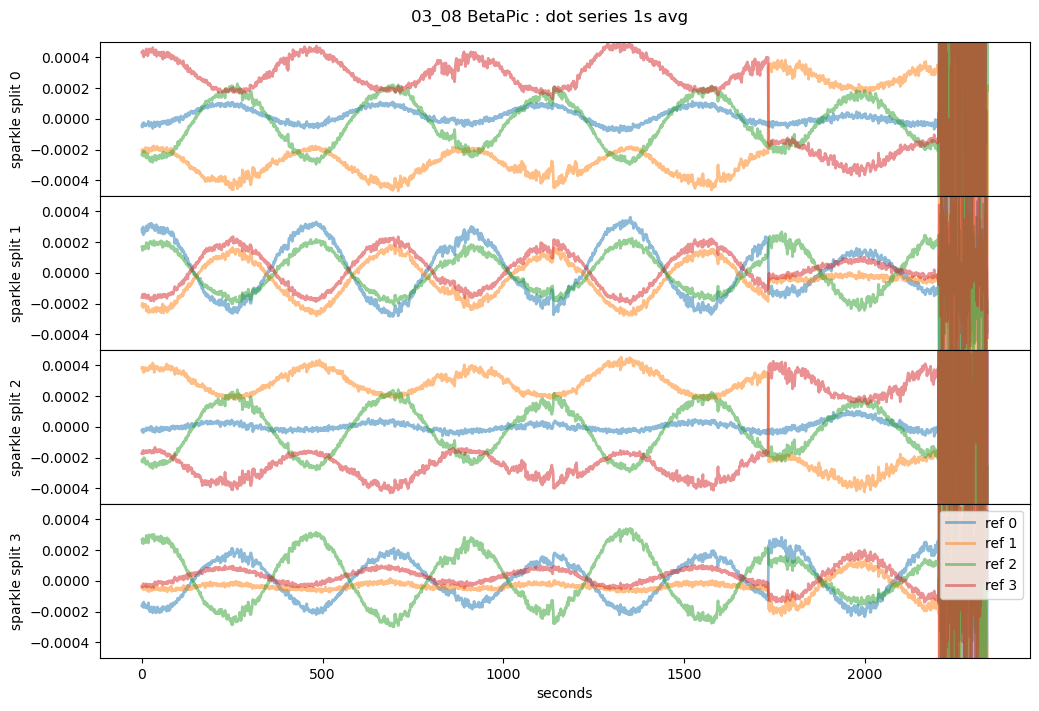

In [10]:
sp.plot_dotSeries_all("03_08 BetaPic ", avg_dot_0307, min=-0.0005, max=0.0005)

# 03_10 - Beta Pic

In [ ]:
# need to lookyloo - no selfRM

# 03_10 - HR4796A

MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 4   ANGS : 0   AMPS : 0.02   CROSS : 1 

In [ ]:
# SelfRM data
selfRM_sky_0310_47 = fits.open(RM_dir + 'selfRM_20230309_10_HR4796a_sparkles.fits')[0].data
selfRM_lab_0310_47 = fits.open(RM_dir + 'selfRM_LAB_20230308_20_002.fits')[0].data # TODO: change

# data directories
sky_dir_0310_47 = data_dir + "03_10_spark_HR4796A/camwfs/"
lab_dir_0308 = lab_dir + "lab_1800_sparkles_1Hz_amp020_sep20/camwfs/" # TODO: change

In [ ]:
sp_sky_0310_HR47= spkl.Spark(sky_dir_0310_47, lab_dir_0308, dir_calib, dark, mask, ref)

In [31]:
# Generate sparkles object
reload(spkl)
demo_files = sp_sky_0310_HR47.file_lister(sky_dir_0310_47)
spkl.print_sparkle_params(spkl.get_spark_params_file(sky_dir_0310_47 + demo_files[216300]))

MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 4   ANGS : 0   AMPS : 0.02   CROSS : 1  


# 3_10 - HD143675

In [ ]:
# need to lookyloo

# 3_11 - HD72946
 
MOD : 1   TRIG : 1   FREQ : 2000   SEPS : 15   ANGS : 0   AMPS : 0.05   CROSS : 1 

In [3]:
# data directories - NOT USING - 2000Hz
sky_dir_0311_72 = data_dir + "03_11_spark_HD72946/camwfs/"
#lab_dir_0308 = lab_dir + "lab_1800_sparkles_1Hz_amp020_sep20/camwfs/" # TODO: change

In [4]:
spkl.print_sparkle_params(spkl.get_spark_params(sky_dir_0310_47))

MOD : 1   TRIG : 1   FREQ : 2000   SEPS : 15   ANGS : 0   AMPS : 0.05   CROSS : 1  


# 3_12 - HD61005

In [ ]:
# doesn't have a selfRM

# 3_12 - TWA7, A-B
- has weird sparkle parameters

MOD : 1   TRIG : 1   FREQ : 899.911   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1  

MOD : 1   TRIG : 1   FREQ : 899.911   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1  

MOD : 1   TRIG : 1   FREQ : 899.911   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1

In [5]:
# data directories - NOT USING - 899Hz issue
sky_dir_0312_TW_A = data_dir + "03_12_spark_TWA7_A/camwfs/"
sky_dir_0312_TW_B = data_dir + "03_12_spark_TWA7_B/camwfs/"
sky_dir_0312_TW_C = data_dir + "03_12_spark_TWA7_C/camwfs/"

# 3_12 - PSF SAO202005, A-B

In [ ]:
# need to lookyloo

# 3_13 - HR2562
MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1 

In [7]:
sky_dir_0313_HR25 = data_dir + "03_13_spark_HR2562/camwfs/"
lab_dir_0313_HR25 = data_dir + "LAB/lab_1800_sparkles_1Hz_amp020_sep15/camwfs/"

In [8]:
spkl.print_sparkle_params(spkl.get_spark_params(sky_dir_0313_HR25))

MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1  


# 3_13 - HD106906

MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1

In [8]:
sky_dir_0313_HD10 = data_dir + "03_13_spark_HD106906/camwfs/"
lab_dir_0313_HR10 = data_dir + "LAB/lab_1800_sparkles_1Hz_amp020_sep15/camwfs/"

In [5]:
spkl.print_sparkle_params(spkl.get_spark_params(sky_dir_0313_HD10))

MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1  


{'MOD': 1,
 'TRIG': 1,
 'FREQ': 1799.82,
 'SEPS': 15,
 'ANGS': 0,
 'AMPS': 0.02,
 'CROSS': 1}

In [9]:
# Pulling saved dot product
avg_dot_file = sky_dir_0313_HD10.replace('camwfs/', "data_chunks_list.npy")
avg_dot_0313_HD10 = np.vstack(np.load(avg_dot_file))

FileNotFoundError: [Errno 2] No such file or directory: '/home/eden/data/2023A/03_13_spark_HD106906/data_chunks_list.npy'

TypeError: string indices must be integers

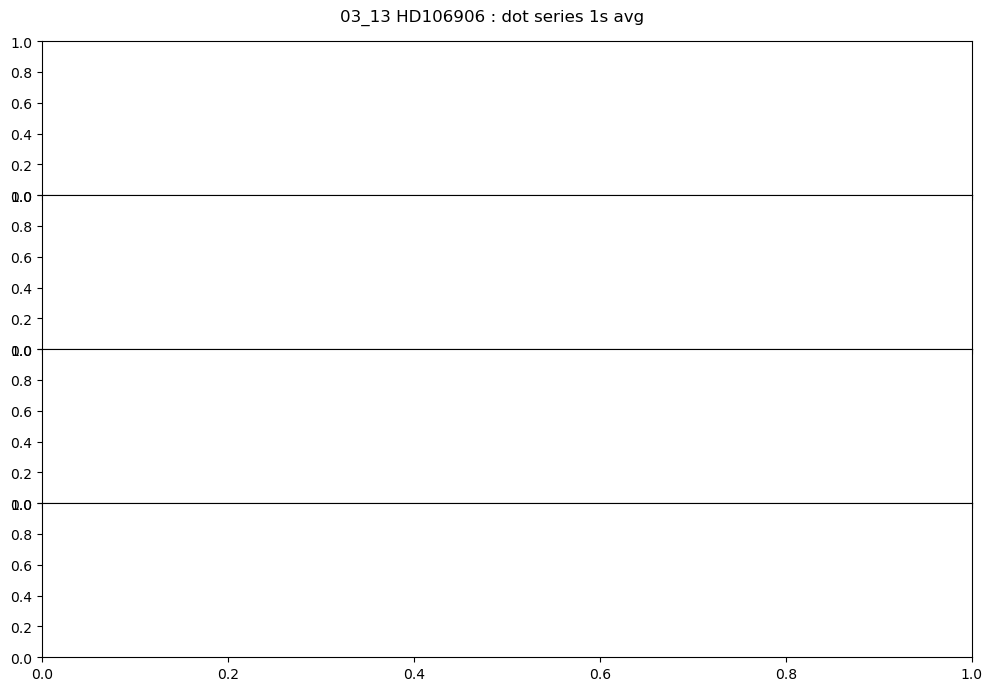

In [6]:
sp.plot_dotSeries_all("03_13 HD106906", sky_dir_0313_HD10, min=-0.0015, max=0.0015)

# 3_13 - PSF HD144271, A-B

A -  MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1 

B - MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1 

In [11]:
sky_dir_0313_HD14_A = data_dir + "03_13_spark_PSF-HD144271_A/camwfs/"
sky_dir_0313_HD14_B = data_dir + "03_13_spark_PSF-HD144271_B/camwfs/"
lab_dir_0313_HR14 = data_dir + "LAB/lab_1800_sparkles_1Hz_amp020_sep15/camwfs/"

In [12]:
reload(spkl)
spkl.print_sparkle_params(spkl.get_spark_params(sky_dir_0313_HD14_A))
spkl.print_sparkle_params(spkl.get_spark_params(sky_dir_0313_HD14_B))

MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1  
MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1  


{'MOD': 1,
 'TRIG': 1,
 'FREQ': 1799.82,
 'SEPS': 15,
 'ANGS': 0,
 'AMPS': 0.02,
 'CROSS': 1}

# 3_13 - HD141569

MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1  

In [10]:
# not using yet - doesn't have a selfRM
sky_dir_0313_HD1415 = data_dir + "03_13_spark_HD141569/camwfs/"
lab_dir_0313_HR1415 = data_dir + "LAB/lab_1800_sparkles_1Hz_amp020_sep15/camwfs/"

In [11]:
spkl.print_sparkle_params(spkl.get_spark_params(sky_dir_0313_HD1415))

MOD : 1   TRIG : 1   FREQ : 1799.82   SEPS : 15   ANGS : 0   AMPS : 0.02   CROSS : 1  


{'MOD': 1,
 'TRIG': 1,
 'FREQ': 1799.82,
 'SEPS': 15,
 'ANGS': 0,
 'AMPS': 0.02,
 'CROSS': 1}

In [13]:
# Pulling saved dot product
avg_dot_file = sky_dir_0313_HD1415.replace('camwfs/', "data_chunks_list.npy")
avg_dot_0313_HD14 = np.vstack(np.load(avg_dot_file))

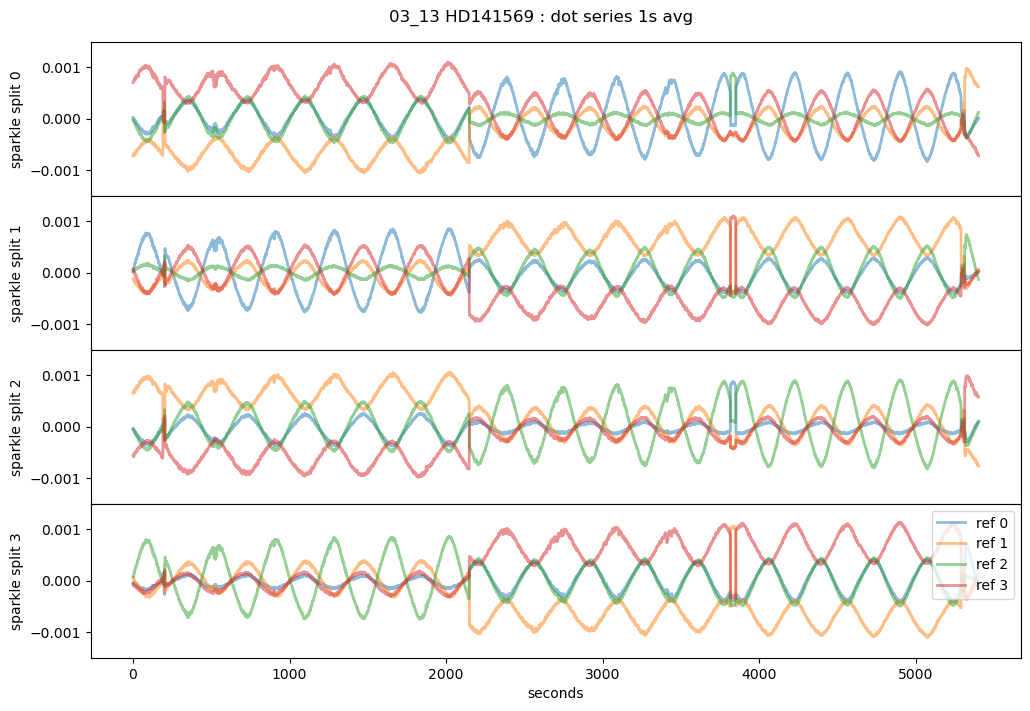

In [18]:
sp.plot_dotSeries_all("03_13 HD141569 ", avg_dot_0313_HD14, min=-0.0015, max=0.0015)

# 3_14 - HD100546

MOD : 1   TRIG : 1   FREQ : 1   SEPS : 15   ANGS : 0   AMPS : 0.016283   CROSS : 1

In [11]:
sky_dir_0314_HD10 = data_dir + "03_14_spark_HD100546/camwfs/"
lab_dir_0314_HD10 = data_dir + "LAB/lab_1800_sparkles_1Hz_amp016_sep15/camwfs/"

In [12]:
spkl.print_sparkle_params(spkl.get_spark_params(sky_dir_0314_HD10))

MOD : 1   TRIG : 1   FREQ : 1   SEPS : 15   ANGS : 0   AMPS : 0.016283   CROSS : 1  


{'MOD': 1,
 'TRIG': 1,
 'FREQ': 1,
 'SEPS': 15,
 'ANGS': 0,
 'AMPS': 0.016283,
 'CROSS': 1}

In [13]:
# Pulling saved dot product
avg_dot_file = sky_dir_0314_HD10.replace('camwfs/', "data_chunks_list.npy")
avg_dot_0314_HD10 = np.vstack(np.load(avg_dot_file))

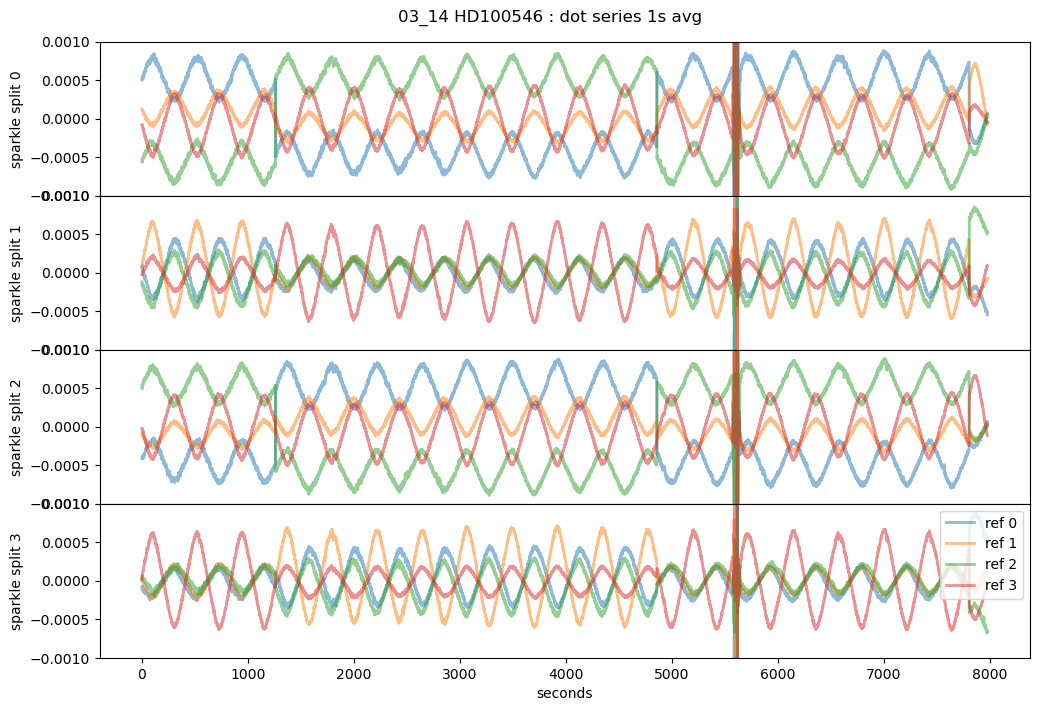

In [15]:
sp.plot_dotSeries_all("03_14 HD100546 ", avg_dot_0314_HD10, min=-0.001, max=0.001)

# 03_16 - BetaPic, A-C
/
MOD : 1   TRIG : 1   FREQ : 1   SEPS : 22   ANGS : -20   AMPS : 0.02   CROSS : 1 

In [3]:
sky_dir_0316_BetaPic_B = data_dir + "03_16_spark_BetaPic_B/camwfs/"

In [4]:
spkl.print_sparkle_params(spkl.get_spark_params(sky_dir_0316_BetaPic_B))

MOD : 1   TRIG : 1   FREQ : 1   SEPS : 22   ANGS : -20   AMPS : 0.02   CROSS : 1  


In [5]:
# Pulling saved dot product
avg_dot_file_0316 = sky_dir_0316_BetaPic_B.replace('camwfs/', "data_chunks_list.npy")
avg_dot_0316 = np.vstack(np.load(avg_dot_file_0316))

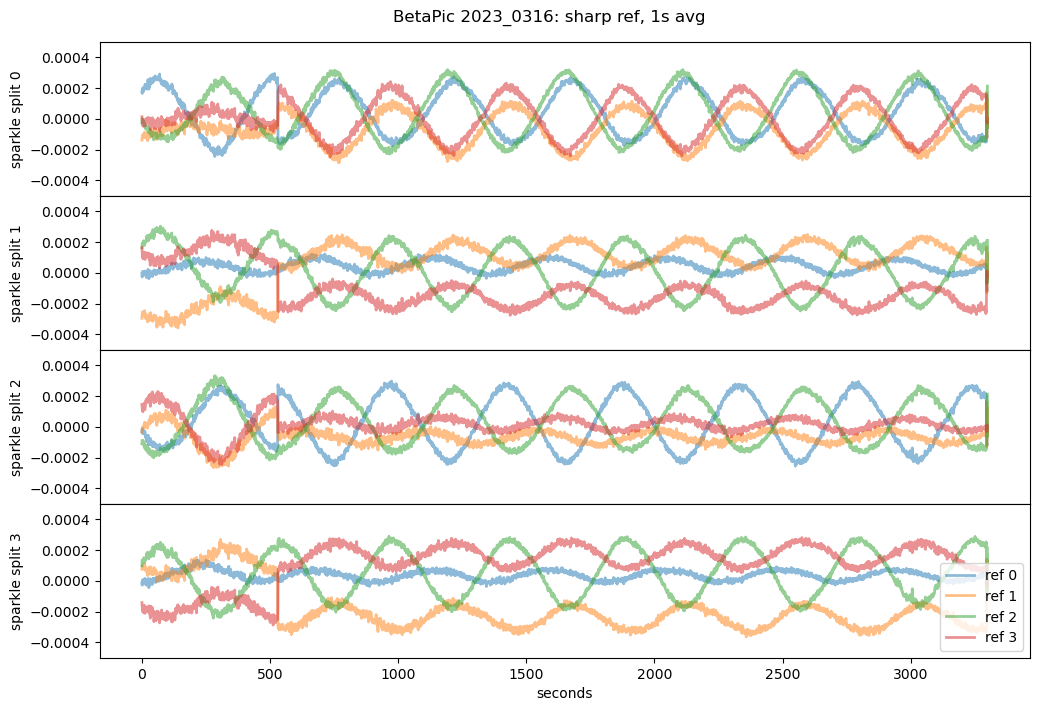

In [9]:
sp.plot_dotSeries_all("03_16 BetaPic ", avg_dot_0316, min=-0.001, max=0.001)

# 03_16 - HD95086

# 03_16 - HD143006